# Lab 1 - Intrinsic Explainable Models

#### Topics:
- Familiarize yourself with the libraries
- Load the Data
- Perform Basic Exploratory Data Analysis
- Using Intrinsic Explainable Models
- Intrinsic Model Experiments

## 1) Familiarize yourself with the libraries
a) Read the description of the libraries that are used and what is the purpose of each in the

In [81]:
import os  # python default library to implement os tasks, such as reading and creating file paths from the disk.
import sklearn  # library with multiple machine learning models implemented already to be used for ease

import numpy as np  # A staple in python math functions
import pandas as pd  # A staple in python data processing and data science
import seaborn as sns  # A library with many pre-configured plots to reduce time to plot data

import matplotlib.pyplot as plt  # The library which has implemented most of the plots

from sklearn.model_selection import train_test_split  # A utility method made for splitting training and testing data

from sklearn.linear_model import LogisticRegression  # the models implemented by sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score  # accuracy metrics

### a) Add the name of the file, and it’s format.

In [82]:
FMT = 'csv'
FILE_NAME = 'heart'

PATH_TO_DIR = os.getcwd()
PATH_TO_FILE = os.path.join(PATH_TO_DIR, f'{FILE_NAME}.{FMT}')

### b) Find the method in ”pandas” libraries to read this file format.
[Reference to pandas io submodule](https://pandas.pydata.org/docs/reference/io.html)

In [83]:
read_method = pd.read_csv
heart_data = read_method(PATH_TO_FILE, sep=',', header=0, decimal='.', engine='python')
print(heart_data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

### c) Explain the following default arguments for the read method and how they link to the data being imported:

#### i) Explain the use of ‘sep’ or ‘delimiter’ argument.
The character that divides features in the input file is specified using this argument.
#### ii) Explain the use of ‘header’ argument
This option specifies whether there is a header row in the input file and which row should be treated as the header.
#### iii) Explain the use of ‘decimal’ argument and its importance in financial data sets.
In the dataset, the decimal point character is specified by this argument. Due to varied traditions, financial datasets from different regions or nations may have different decimal separators. For instance, most English-speaking nations use a period as the decimal point, but many European nations use a comma.

Note: to be able to explain AI methods, it is also important to have good data analyst skills, since if the data we use can not be explained or is imported incorrectly, we are then trying to explain meaningless result

In [84]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In practice this is printed to make sure the row indices are imported correctly and the columns of the data are correct.

In the next cells we make sure the data is clean, although for these labs only clean data is given since this is not a learning objective of the module, but it is important to be consistent with these steps.

## 3) Perform Basic Exploratory Data Analysis

For our exercise we want to explain the classification from the first 13 attributes to predict the target class, if there is a heart disease or not.

In [85]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [86]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### a) From your theory explain which model(s) can be used for a classification task.

The target feature is a binary categorical variable from the heart data dataframe provided, making it appropriate for a binary classification. The following models may be used for this task:
Logistic regression: A supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. The logistic regression model is a linear model that uses the logistic function to model a binary dependent variable. The logistic function is a sigmoid function that takes any real input and outputs a value between 0 and 1, which can be interpreted as a probability.
Decision trees: Can be used for binary classification, in this case to take the input from 13 attributes to predict the target class, whether there is a heart disease or not. The decision is made  by recursively partitioning the feature space into regions, with each leaf node representing a class label.
k-nearest neighbors: A supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. K-NN is simple to implement but may not perform well with high-dimensional data. For classification problems, a class label is assigned on the basis of a majority vote, the label that is most frequently represented around a given data point is used.

### b)  If for some reason you were limited to using only a few attributes, for instance choose 5 out of 13 attributes from the data set to train a model, how would you choose those attributes? (note: we can not use any advanced XAI methods yet since they require a trained model)

HINT: this method’s result can be shown using a heatmap.

##### Answer:
If we are restricted to employing a small number of attributes, one of the main strategies we may use to choose these attributes is based on correlation with the target variable. For the classification task, the characteristics that show a strong correlation (either positive or negative) with the target variable are probably good predictors. The model may then be trained using the chosen features. The correlation between the target variable and the chosen features may be shown using a heatmap.

### c) How does the answer the previous question assist the explanation of the model.

##### Answer:
The structure of the model is made simpler by reducing the amount of attributes used in it. We may highlight how these chosen properties affect the result when describing the model's predictions as they are more closely related to the target variable. We may reduce this noise by focusing on highly correlated features, generating predictions that are more reliable and understandable.

### d) Perform the method in your answer to question 3) b).

Use matplotlib.pyplot.figure() for creating a figure and appropriate method in pandas library for the stated method's calculation then use seaborn.heatmap(*arguments) with appropriate arguments to display the results of the calculation.

[MatPlotLib.PyPlot.Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
[Pandas Library Method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

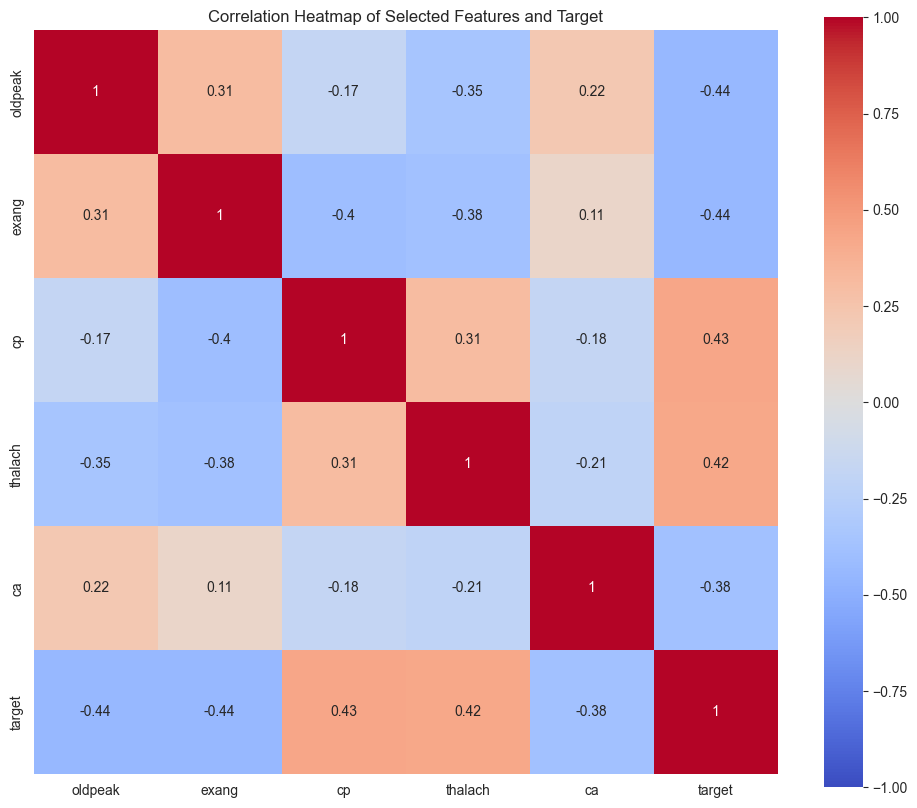

In [87]:
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
correlation_matrix = heart_data.corr()
target_correlations = correlation_matrix["target"].drop("target")
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

# Plot the heatmap
selected_features = sorted_correlations.head(5).index.tolist()
selected_corr_matrix = heart_data[selected_features + ['target']].corr()
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

plt.title("Correlation Heatmap of Selected Features and Target")
plt.show()

### e) What are the top 5 most “explainable” attributes for the target class?

In [88]:
top_features = correlation_matrix["target"].drop("target").apply(abs).sort_values(ascending=False).head(5)
print("Top 5 Explainable Attributes:", top_features.index.tolist())

Top 5 Explainable Attributes: ['oldpeak', 'exang', 'cp', 'thalach', 'ca']


##### Answer: 'oldpeak', 'exang', 'cp', 'thalach', 'ca'

## Split the data into Train and Test Sets

For the models, we need to make a split of the train and test data sets.

In [89]:
data = heart_data.drop('target', axis=1)
labels = heart_data.target
data.shape, labels.shape

((1025, 13), (1025,))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head(3)

(820, 13) (205, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2
204,66,0,2,146,278,0,0,152,0,0.0,1,1,2
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2


## 4) Using Intrinsic Explainable Models

### a) Train a Logistic, Tree, and kNN model on the training data.

[Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
[Decision Tree Model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
[kNN Model](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [91]:
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()

In [92]:
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Predictions and Evaluation

In [93]:
predictions_log = log_model.predict(X_test)
predictions_tree = tree_model.predict(X_test)
predictions_knn = knn_model.predict(X_test)

log_score = f1_score(y_test, predictions_log, average='macro')
tree_score = f1_score(y_test, predictions_tree, average='macro')
knn_score = f1_score(y_test, predictions_knn, average='macro')

print(f'{log_score=}, {tree_score=}, {knn_score=}')

log_score=0.8616734143049933, tree_score=1.0, knn_score=0.7461904761904761


### b) List the parameters that were fit in the logistic regression model and write a brief explanation on what these parameters represent in a logistic model.

Hint: [Read the article](https://quantifyinghealth.com/interpret-logistic-regression-intercept/)

In [94]:
print(f'The models Intercept is: {log_model.intercept_[0]}')
print(f'The coefficients of features are:')
for i, col in enumerate(X_train.columns):
    print(f'{col}: {log_model.coef_[0][i]}')

The models Intercept is: 3.4961451415100244
The coefficients of features are:
age: -0.008777209808240032
sex: -1.7853656321840392
cp: 0.8027056859459677
trestbps: -0.01646650218447819
chol: -0.005118397116154434
fbs: 0.0020168535761412197
restecg: 0.5421803419068496
thalach: 0.022950736807678902
exang: -0.9385075802175957
oldpeak: -0.6281247915159152
slope: 0.38170738995591597
ca: -0.6794921056940232
thal: -0.8411413783347277


##### Answer:
i) Coefficients(Weights): Coefficient associated with each feature represents the log-odds of the probability of the target class for a one-unit change in the corresponding feature, while holding all other features constant. A positive coefficient implies that an increase in the feature's value increases the likelihood of belonging to the positive class, while a negative coefficient implies the opposite.
ii) Intercept: It represents the log-odds of the probability of the target class when all features are zero. The intercept can be thought of as the baseline probability of belonging to the positive class when all other factors are absent or have no effect.


### c) Produce a decision tree from the trained model something that a person can use to explain a decision of the model.

[Reference to scikit.tree Submodule](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

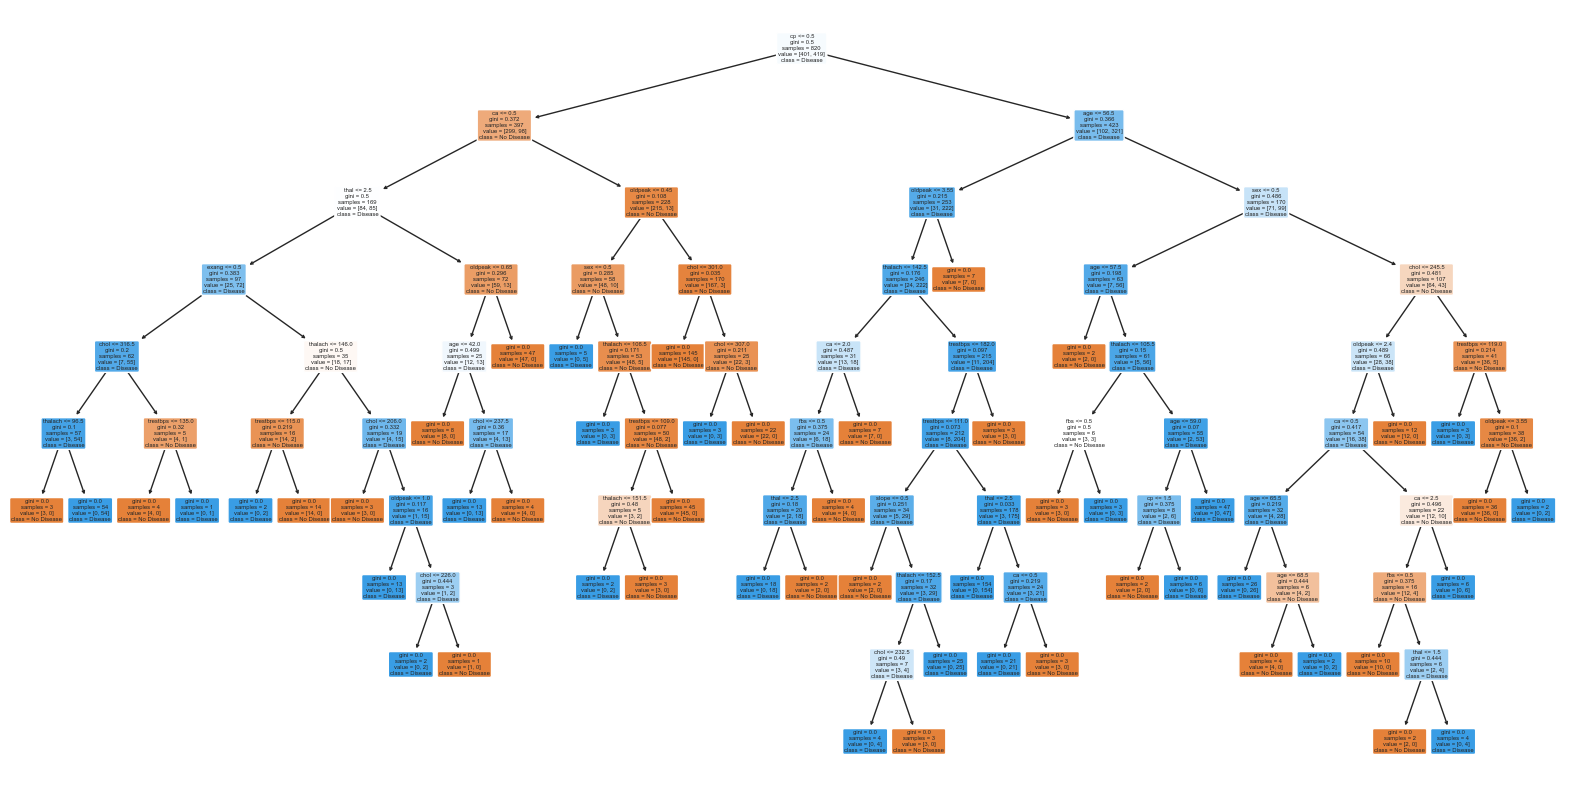

In [95]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=["No Disease", "Disease"], rounded=True)

plt.show()

### d) Explain the importance of different parameters values in Decision Trees and kNN models.

For Decision Trees, parameters help in controlling the tree's depth and complexity, preventing over-fitting, and ensuring that splits are meaningful.
For kNN, parameters determine how neighbors are chosen and weighted, which affects the classification or regression outcome.

## Intrinsic Model Experiments

### a) Use different methods of splitting for Decision Tree. Plot the different accuracies and comment on how each split is different.

### b) Plot the accuracy scores for different values of k in the kNN model and comment on how the explanation changes with different values of k.

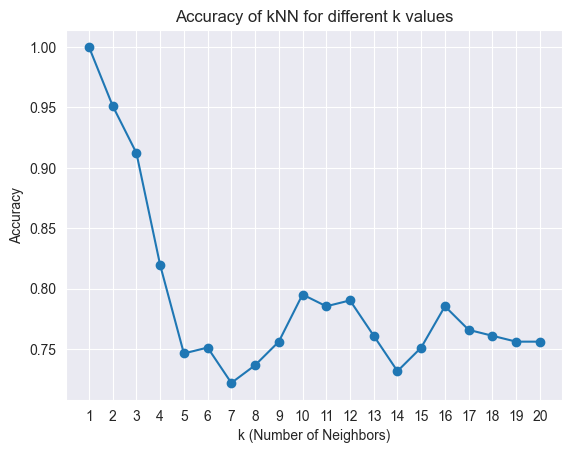

In [97]:
# List of k values
k_values = range(1, 21)  # Using values from 1 to 20
accuracies = []

# Train a kNN classifier for each k and store the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN for different k values')
plt.xticks(k_values)
plt.grid(True)
plt.show()